In [3]:
# 推測統計のためのライブラリ、データ準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
from scipy import integrate
import warnings

# 積分に関するwarningを出力しないようにする
warnings.filterwarnings('ignore',
                                           category=integrate.IntegrationWarning)

In [5]:
# 1次元の連続型確率変数を考える
# 確率密度関数 or 密度関数と言われる積分を含んだ関数で定義する
# 確率変数Xがx0=< X <= x1の区間に入る確率Pで定義される
# →密度関数に囲まれた領域の面積が確率になる

# いかさまルーレットがとりうる値の区間の下限と上限を定義する
x_range = np.array([0, 1])

In [6]:
# 密度関数を定義する
def f(x):
    if x_range[0] <= x <= x_range[1]:
        # xではなく2xとしているのは確率の総和を1とするため
        return 2 * x
    else:
        return 0

In [7]:
X = [x_range, f]

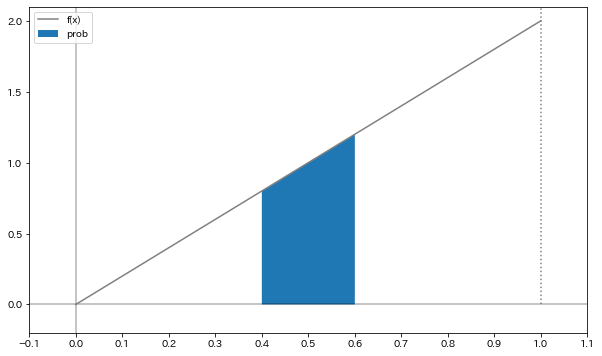

In [8]:
# 密度関数f(x)を図示する
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4から0.6のx座標を用意
xs = np.linspace(0.4, 0.6, 100)
# xsの範囲でf(x)とx軸に囲まれたを塗りつぶす
ax.fill_between(xs, [f(x) for x in xs], label='prob')
ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [9]:
# 台形の面積を積分を用いて求める
# 第1引数が被積分関数、第2引数と第3引数が積分区間
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [10]:
# 確率の性質
# →確率は0以上である
# を満たしているかチェック
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 関数の最小値はfunというインスタンス変数に
res.fun

0

In [11]:
# 確率の性質
# →確率の総和は1である
# を満たしているかチェック

# -∞から+∞までの積分
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [12]:
# 累積分布関数
# →x以下になる確率は-∞からxまで積分すれば良い
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [13]:
# 例としてルーレットが0.4から0.6の間を取る確率を求める
F(0.6) - F(0.4)

0.200

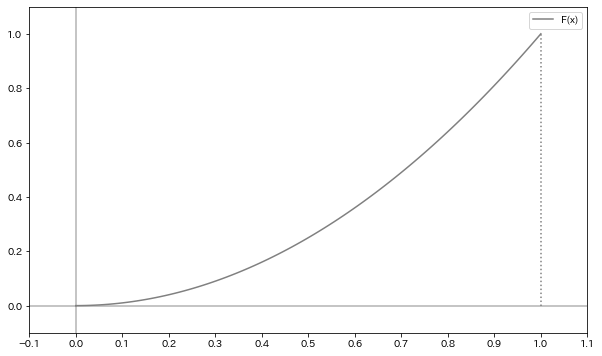

In [14]:
# 分布関数F(x)を図示する
# ※分布関数は必ず単調増加(確率はすべて正の値をとるから?)
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyle=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [15]:
# 確率変数の変換
# 5章と同様に、ルーレットのでために2をかけて3を足した
# 2X + 3を用いる
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

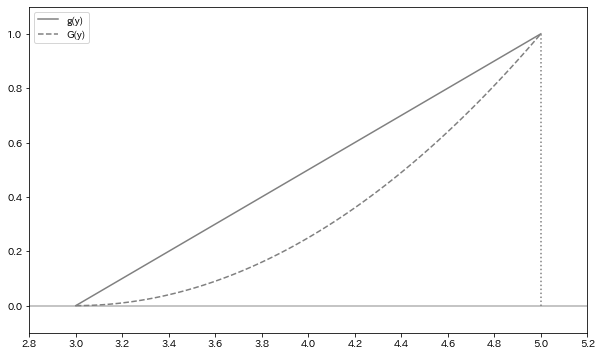

In [17]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
       label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
       label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [18]:
# 期待値
# 出る目の値とその目のでる確率をかけたものの総和
# 離散型確率の式がΣ→∫になっただけ
def integrand(x):
    return x * f(x)

# -∞から+∞までの積分
integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [19]:
# 変換した確率変数にも対応した
# 期待値の関数の実装

def E(X, g=lambda x: x):
    x_range, f=X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [20]:
E(X)

0.667

In [23]:
E(X, g=lambda x: 2*x + 3)

4.333

In [24]:
# 期待値の線形性の確認
2 * E(X) + 3

4.333

In [27]:
# 分散
# # (出る目の値-期待値)の2乗とその目のでる確率をかけたものの総和
mean = E(X)
def integrand(x):
    return (x-mean) ** 2 * f(x)
integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [28]:
# 変換した確率変数にも対応した
# 分散の関数の実装
def V(X, g=lambda x: x):
    x_range, f=X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean)**2*f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [29]:
V(X)

0.056

In [30]:
V(X, lambda x: 2*x + 3)

0.222

In [31]:
# 分散の線形性の確認
2**2*V(X)

0.222

In [32]:
# 2次元の連続型確率変数を考える
# 2つのルーレットA、Bを回し、Aの値を確率変数Y、A+Bの値を確率変数Xとした、
# 2次元の確率変数(X, Y)を考える

# XとYのとりうる値を定義
x_range = [0,2]
y_range = [0,1]

In [33]:
# 同時確率密度関数を定義
def f_xy(x, y):
    if 0 <= y <= 1 and 0<=x-y <= 1:
        return 4 * y * (x-y)
    else:
        return 0

In [34]:
# 確率変数の振る舞いをリスト化しておく
XY = [x_range, y_range, f_xy]

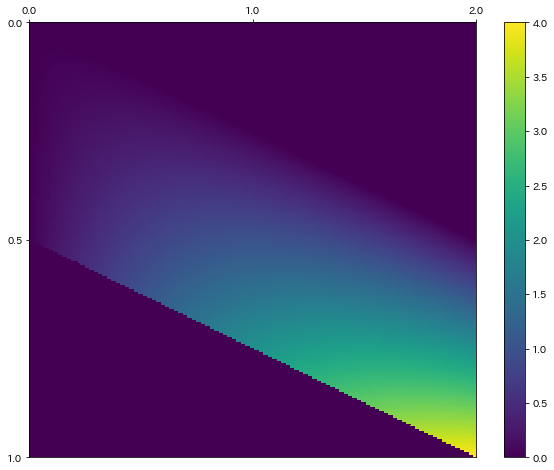

In [37]:
# 同時確率密度関数をヒートマップで図示する
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [38]:
# 多重積分
# 第一引数に被積分関数、第二引数にxの積分区間とyの積分区間
integrate.nquad(f_xy,
               [[-np.inf, np.inf],
               [-np.inf, np.inf]])[0]

1.000

In [39]:
# 確率変数Xの密度関数のみを知りたいので
# 同時確率密度関数をyについてのみ積分する

from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [40]:
X = [x_range, f_X]
Y = [y_range, f_Y]

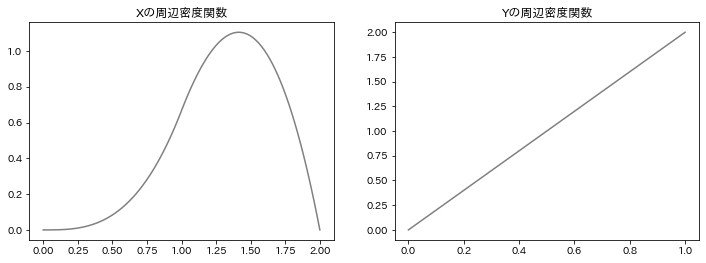

In [43]:
# X、Yそれぞれの密度関数を図示する
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('Xの周辺密度関数')
ax2.set_title('Yの周辺密度関数')

plt.show()

In [45]:
# 期待値
# 1次元の連続型確率変数とほぼ同じ
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(integrand,
                               [[-np.inf, np.inf],
                               [-np.inf, np.inf]])[0]

1.333

In [46]:
# 期待値の一般式の定義
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                                              [[-np.inf, np.inf],
                                              [-np.inf, np.inf]])[0]

In [47]:
# X、Yの期待値をそれぞれ求める
mean_X = E(XY, lambda x, y: x)
mean_X

1.333

In [48]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.667

In [49]:
# 線形性の確認
a, b = 2, 3

In [50]:
E(XY, lambda x, y: a*x + b*y)

4.667

In [51]:
a * mean_X + b * mean_Y

4.667

In [52]:
# 分散
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand,
                               [[-np.inf, np.inf],
                               [-np.inf, np.inf]])[0]

0.111

In [53]:
# 分散の一般式の定義
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)
    
    return integrate.nquad(integrand,
                                              [[-np.inf, np.inf],
                                              [-np.inf, np.inf]])[0]

In [54]:
var_X = V(XY, lambda x, y: x)
var_X

0.111

In [55]:
var_Y = V(XY, lambda x, y: y)
var_Y

0.056

In [56]:
# 共分散を求める
# 確率変数X、Yの間にどの程度相関があるかわかる
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                                              [[-np.inf, np.inf],
                                              [-np.inf, np.inf]])[0]

In [57]:
cov_xy = Cov(XY)
cov_xy

0.056

In [58]:
V(XY, lambda x, y: a*x + b*y)

1.611

In [ ]:
a**2 * var_X